In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
x = df[["Age","EstimatedSalary"]].values #Los datos a analizar, edad y salario y obtengo los valores
x[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [13]:
y = df["Purchased"].values #Los labels que permiten clasificar si en  base a su edad y salario compraron
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [24]:
#Separamos los conjuntos en entrenamiento y test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,test_y = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [18]:
print(x_train[:5],"\n--------\n",x_test[:5])

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]] 
--------
 [[   30 87000]
 [   38 50000]
 [   35 75000]
 [   30 79000]
 [   35 50000]]


In [19]:
# Estandarizamos las escalas
from sklearn.preprocessing import StandardScaler
#Creamos el objeto
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [20]:
print(x_train[:5],"\n--------\n",x_test[:5])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]] 
--------
 [[-0.54748976  0.5130727 ]
 [ 0.15442019 -0.61825566]
 [-0.10879604  0.14615539]
 [-0.54748976  0.26846116]
 [-0.10879604 -0.61825566]]


In [22]:
#Entrenamos el modelo de naive bayes
from sklearn.naive_bayes import GaussianNB
#Creamos el objeto clasificador
classifier = GaussianNB()

In [25]:
classifier.fit(x_train,y_train) #entrenamos el modelo

GaussianNB()

In [26]:
y_pred = classifier.predict(x_test)

In [47]:
errors = 1-(y_pred==test_y) 

In [49]:
np.sum(errors)/len(errors) # El porcentaje de errores encontrados
#tenemos un error del 10%

0.1

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

C:\Users\Brayan_Calderon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


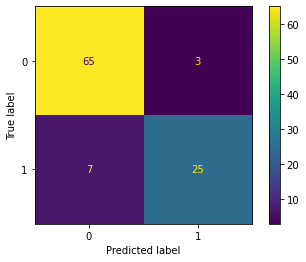

In [44]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, test_y)

In [ ]:
#De la grafica anterior podemos observar que tenemos 65 datos clasificados correctamente como verdaderos positivos, 7 datos que
#clasificaron como 0 cuando eran en realidad  1 es decir falsos negativos y 3 datos que se clasificaron como 1 cuando era 0, es decir
#falsos negativos

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


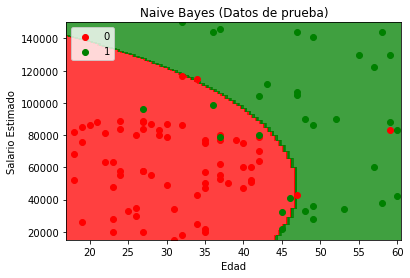

In [55]:
# Visualizacion de los datos de prueba
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, test_y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Datos de prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()